## Personality Analysis for Marketing Campaign 

### **Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Customers Attributes

### **People**

    ID: dfomer's unique identifier
    Year_Birth: dfomer's birth year
    Education: dfomer's education level
    Marital_Status: dfomer's marital status
    Income: dfomer's yearly household income
    Kidhome: Number of children in dfomer's household
    Teenhome: Number of teenagers in dfomer's household
    Dt_dfomer: Date of dfomer's enrollment with the company
    Recency: Number of days since dfomer's last purchase
    Complain: 1 if dfomer complained in the last 2 years, 0 otherwise


**Products**

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years


**Promotion**

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if dfomer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if dfomer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if dfomer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if dfomer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if dfomer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if dfomer accepted the offer in the last campaign, 0 otherwise


**Place**

    NumWebPurchases: Number of purchases made through the company’s web site
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s web site in the last month


##(1) Import libraries

In [1900]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from math import floor
from matplotlib import colors
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


## (2) Import & read the CSV file

In [1901]:
## importing the csv file
df = pd.read_csv('./marketing-campaign.csv')

In [1902]:
## Reading the csv file
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## (3) Explore data (for example, see what is categorial and numerical)

In [1903]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [1904]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [1905]:
## Checking for number of rows and columns
df.shape

(2240, 29)

## (4) Feature engineering for data that is
#### (a) relevant 
#### (b) unique
#### (c) correct 
#### (d) not missing

#### Drop data that is not a,b,c, or d


In [1906]:
# checking for Null values
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [1907]:
## Filling the null values of Income with the mean of income column
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [1908]:
# checking for Null values again to confirm 
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [1909]:
## Checking for unique values in each column
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [1910]:
#Checking NuLL Values And Dropping Them Off
df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [1911]:
## Save a copy of  DF ( beore dropping)
original_df= df

In [1912]:
## Dropping irrelevant features
df = df.drop(columns = [ 'Z_CostContact', 'Z_Revenue'], axis = 1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Changing values

In [1913]:
## name of all columns
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



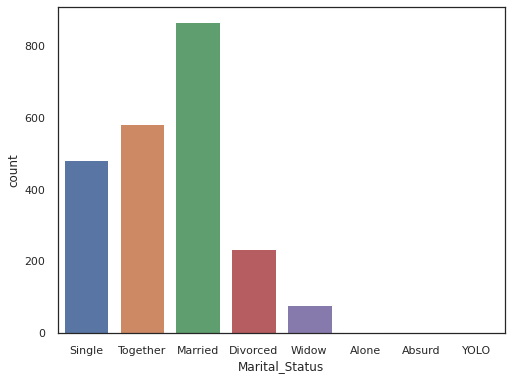

In [1914]:
# Analyze Marital status 
print(df['Marital_Status'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['Marital_Status'])

In [1915]:
#correlation between Marital_Status and the given products 
#('MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')
 
columns_to_be_analyzed = ['MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
Marital_df = df.groupby(by = ['Marital_Status']).agg({'MntWines':'sum','MntFruits':'sum' ,'MntMeatProducts':'sum',
                                              'MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum' }).reset_index()

fig = make_subplots(rows = 3, cols = 3, subplot_titles=columns_to_be_analyzed)
cnt = 0
for i in range(2):
    for j in range(3):
        fig.add_trace(go.Bar(x = Marital_df['Marital_Status'].to_numpy(), 
                             y = Marital_df[columns_to_be_analyzed[cnt]].to_numpy()), row = i+1, col=j+1 )
        cnt+=1
fig.update_layout(  title = 'Columns Vs Amount of quantity',font=dict(
        family="Courier New, monospace", size=12, color="#7f7f7f"), showlegend=False,autosize=True,width=1200,height=800)
fig.show()

In [1916]:
## Changing marital status
## using map function from dataframe
marital_status = {
    "Single": "non_relationship",
    "Together": "in_relationship",
    "Married": "in_relationship",
    "Divorced": "non_relationship",
    "Widow": "non_relationship",
    "Alone": "non_relationship",
    "Absurd": "non_relationship",
    "YOLO": "non_relationship"
}

In [1917]:
## Below command goes through every entry in the notebook and replaces each data with its associated value in the dictionary
df["Marital_Status"] = df["Marital_Status"].map(marital_status)

In [1918]:
## Checking if everything is substituted
df["Marital_Status"].value_counts()

in_relationship     1444
non_relationship     796
Name: Marital_Status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



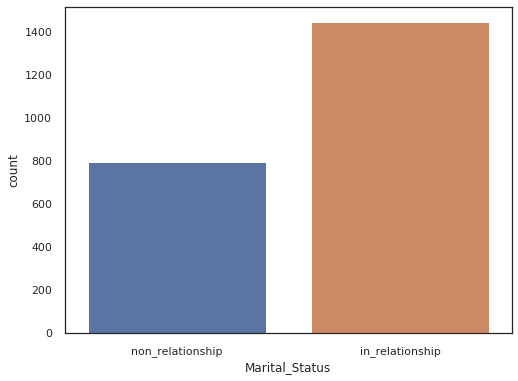

In [1919]:
## Visulaize Marital Status
plt.figure(figsize=(8,6))
sns.countplot(df['Marital_Status']) 

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



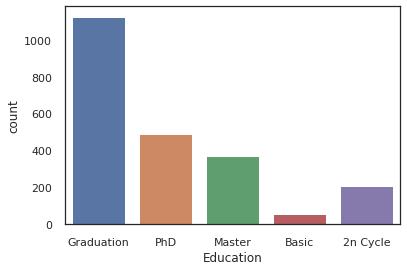

In [1920]:
# Analyze Education 
print(df['Education'].value_counts())
sns.countplot(df['Education'])
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=df['Education'].value_counts().index, values=df['Education'].value_counts().values)])
fig.update_layout(height=400, width=500, title_text="Pie chart showing Education")
fig.show()

In [1921]:
# Correlation we can find between Education and the given products 
#('MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')


Edu_df = df.groupby(by = ['Education']).agg({'MntWines':'sum','MntFruits':'sum' ,'MntMeatProducts':'sum','MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum' }).reset_index()

fig = make_subplots(rows = 3, cols = 3, subplot_titles=columns_to_be_analyzed)
cnt = 0
for i in range(2):
    for j in range(3):
        fig.add_trace(go.Bar(x = Edu_df['Education'].to_numpy(), 
                             y = Edu_df[columns_to_be_analyzed[cnt]].to_numpy()), row = i+1, col=j+1 )
        cnt+=1
fig.update_layout(  title = 'Columns Vs Amount of quantity',font=dict(
        family="Courier New, monospace", size=12, color="#7f7f7f"), showlegend=False,autosize=True,width=1200,height=800)
fig.show()

In [1922]:
## Changing  Education
## using map function from dataframe
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [1923]:
## Classifying education into two categories. 
## 1. Undergraduate
## 2. Post Graduate

df['Education'] = df['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'], 'Post Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduation')

Unique categories present in the Education:
 Post Graduate       2186
Under Graduation      54
Name: Education, dtype: int64




Text(0.5, 1.0, 'Frequency Of Each Category in the Education Variable \n')

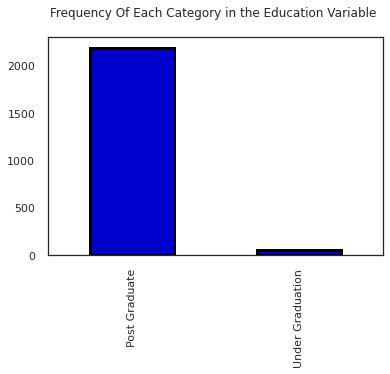

In [1924]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Education"
print("Unique categories present in the Education:\n",df["Education"].value_counts())
print('\n')
#VISUALIZING THE "Education"
df['Education'].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Education Variable \n")

In [1925]:
## Converting from string to datetime 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [1926]:
type(df['Dt_Customer'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Creating more features

In [1927]:
## Analyze Year of Birth
## Adding a column "Age" in the dataframe
df['Age'] =  int(pd.datetime.now().year) - df['Year_Birth']



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



128     1
81      1
122     1
80      1
121     1
25      2
27      3
28      5
26      5
77      7
78      7
76      8
29     13
30     15
75     16
74     16
31     18
73     21
34     27
71     29
33     29
32     30
72     30
36     32
68     35
60     36
37     38
40     39
41     39
57     42
38     42
35     42
64     43
70     43
59     44
54     44
39     45
58     45
61     49
66     49
67     50
55     50
62     51
53     51
69     52
44     52
63     53
42     53
65     55
47     69
52     71
56     74
48     74
43     77
51     77
49     79
46     83
50     87
45     89
Name: Age, dtype: int64
The Oldest customer is : 128 years old
The youngest customer is : 25 years old


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



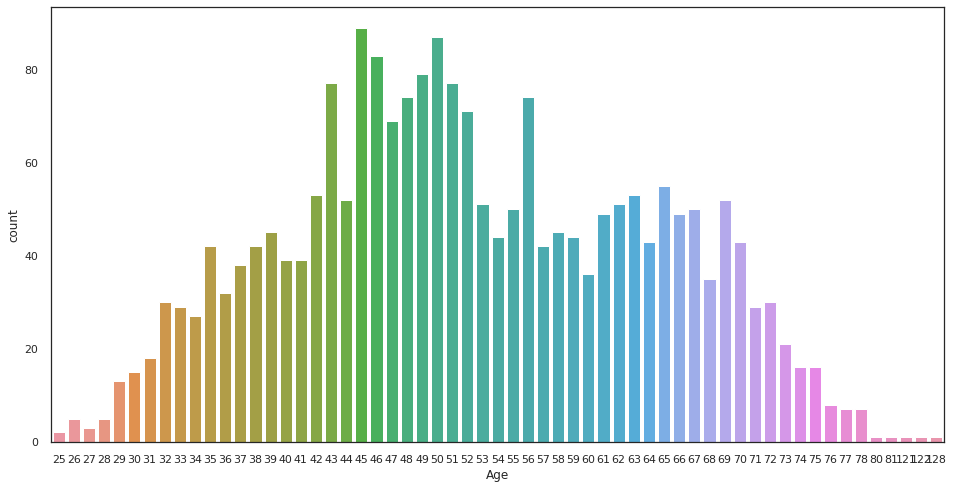

In [1928]:
# print Age 
print(df['Age'].value_counts(ascending=True))
print("The Oldest customer is :",df['Age'].max(), "years old")
print("The youngest customer is :",df['Age'].min(), "years old")
plt.figure(figsize = (16,8))
sns.countplot(df['Age'])

The Oldest customer is : 81 years old
80     1
81     1
25     2
27     3
28     5
26     5
77     7
78     7
76     8
29    13
30    15
75    16
74    16
31    18
73    21
34    27
33    29
71    29
32    30
72    30
36    32
68    35
60    36
37    38
40    39
41    39
57    42
35    42
38    42
70    43
64    43
54    44
59    44
39    45
58    45
66    49
61    49
67    50
55    50
53    51
62    51
69    52
44    52
63    53
42    53
65    55
47    69
52    71
56    74
48    74
51    77
43    77
49    79
46    83
50    87
45    89
Name: Age, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



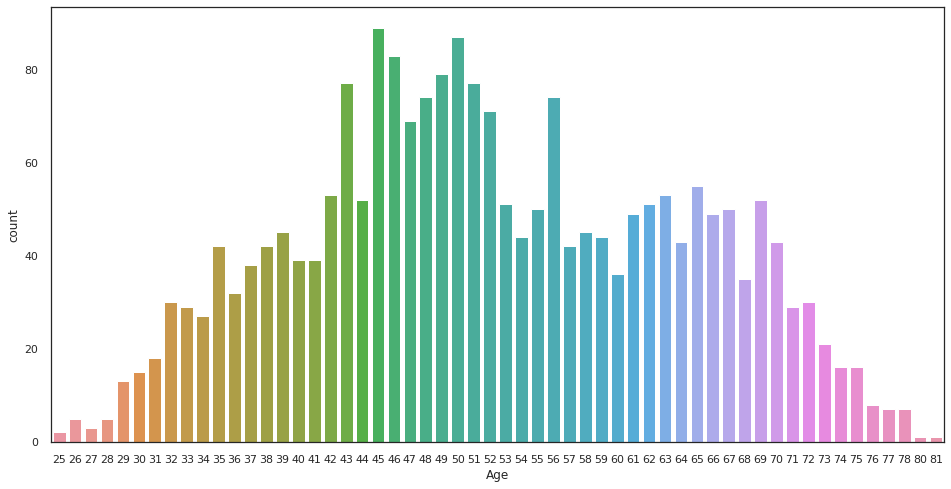

In [1929]:
#Dropping the outliers by setting a cap on Age. 
df = df[(df['Age']<90)]
print("The Oldest customer is :",df['Age'].max(), "years old")
print(df['Age'].value_counts(ascending=True))
plt.figure(figsize = (16,8))
sns.countplot(df['Age'])

In [1930]:
#  correlation  between age and the given products 
#('MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')   
# create function which will give  Age  interval 
 
    
def create_interval_column(age_df, interval):
    inter = []
    interval = interval
    j = 0
    while (j<100):
        j = j + interval
        inter.append(j)
    interval_column = [] 
    for i in age_df['Year_Birth']:
        for j in range(len(inter)-1):
            if inter[j]<i <=inter[j+1]:
                interval_column.append(str(inter[j]) + '-' + str(inter[j+1]))
                break
    return interval_column

interval_you_want_to_plot = 10 

columns_to_be_analyzed = ['MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

age_df = df.groupby(by = ['Year_Birth']).agg({'MntWines':'sum','MntFruits':'sum' ,'MntMeatProducts':'sum','MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum' }).reset_index()
age_df['Year_Birth'] = int(pd.datetime.now().year) - age_df['Year_Birth'] 
age_df.drop([0,1,2], axis = 0, inplace=True)

interval_column = create_interval_column(age_df, interval=interval_you_want_to_plot )# Creating interval of 5

age_df['Interval_column'] = interval_column

fig = make_subplots(rows = 3, cols = 3, subplot_titles=columns_to_be_analyzed)
cnt = 0
for i in range(2):
    for j in range(3):
        fig.add_trace(go.Bar(x = age_df['Interval_column'].to_numpy(), 
                             y = age_df[columns_to_be_analyzed[cnt]].to_numpy()), 
                    row = i+1, col=j+1 )
        cnt+=1
fig.update_layout(  title = 'Columns Vs Amount of quantity',font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"),
                 showlegend=False,autosize=True,
                  width=1200,
                  height=800)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



The higest income customer is : 666666.0 $
The lowest income customer is : 1730.0 $


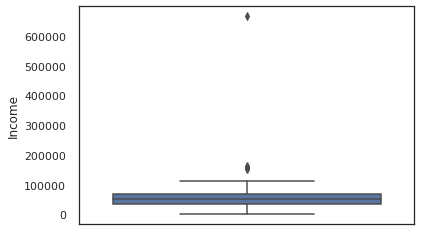

In [1931]:
# Analyze Income

print("The higest income customer is :",df['Income'].max(), "$")
print("The lowest income customer is :",df['Income'].min(), "$")
import seaborn as sns
sns.boxplot( y=df["Income"] );
plt.show()

In [1932]:
## cap on income 
df.query('Income != 666666.0', inplace=True)
print("max income is:",df['Income'].max())
print("min income is:",df['Income'].min())

max income is: 162397.0
min income is: 1730.0


0    1291
1     897
2      48
Name: Kidhome, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



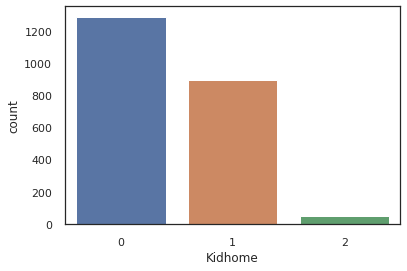

In [1933]:
#Calculate the Kidhome: Number of children in customer's household
print(df['Kidhome'].value_counts())
sns.countplot(df['Kidhome'])

0    1155
1    1029
2      52
Name: Teenhome, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



array([0, 1, 2])

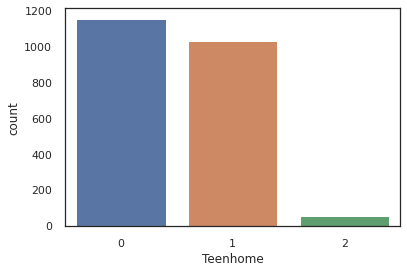

In [1934]:
#Calculate the Teenhome: Number of teens in customer's household
print(df['Teenhome'].value_counts())
sns.countplot(df['Teenhome'])
df['Teenhome'].unique()

Unique categories present in the Kids:
 1    1125
0     637
2     421
3      53
Name: Kids, dtype: int64




Text(0.5, 1.0, 'Frequency Of Each Category in the Kids Variable \n')

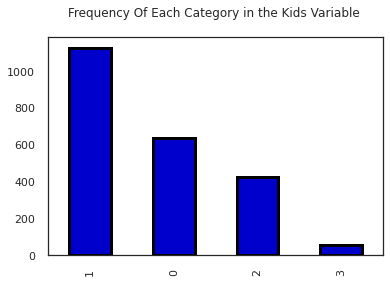

In [1935]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Kids"
print("Unique categories present in the Kids:\n",df['Kids'].value_counts())
print("\n")


#VISUALIZING THE "Kids" variable 
df['Kids'].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Kids Variable \n")



##  Feature engineering

In [1839]:

## Finding total monthly purchase/spend of the customers
df['Total_Spend'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

## Finding the total number of purchases(Deals, web, catelog and store) the customer made 
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Average spend per purchase  
df['Average_Spent'] = round((df['Total_Spend'] / df['Total_Purchases']), 2)

## Total number of accepted offers
df['TotalAcceptedOffers'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']



#Seniority variable creation
## Finding the number of days the person is client
## Finding the max time

df['Collected'] = '2014-12-06'
df['Collected'] = pd.to_datetime(df['Collected'])
df['Days_is_client'] = (df['Collected'] - df['Dt_Customer']).dt.days
 

## Removing customers who didnt make a purchase
## query is used to evaluate some condition 
df = df.query('Total_Purchases != 0')

#highlight the age and time that a person is a client
print( "This customer is with us since",df['Dt_Customer'].min())  
print ("This Customer joined recently from this date:", df['Dt_Customer'].max())



## Recency analysis
print( "Customer with most recent non transaction streak is",df['Recency'].min(),"days")  
print ("Customer with longest non transaction streak is",df['Recency'].max(),"days")
# Rename features 
df=df.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
df=df.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})
df.head()
# Save the data frame (cleaned with new features) under cust- will be used later on 
cust =df.copy()


This customer is with us since 2012-01-08 00:00:00
This Customer joined recently from this date: 2014-12-06 00:00:00
Customer with most recent non transaction streak is 0 days
Customer with longest non transaction streak is 99 days


In [1840]:
# Convert Marital status & Education form categorical variable to Numerical 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
obj_col = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_col.append(col)

label_encoder = LabelEncoder()
for col in obj_col:
    df[col] = label_encoder.fit_transform(df[col])
print(obj_col) 

['Education', 'Marital_Status']


Maretial-status 
 0    1441
1     791
Name: Marital_Status, dtype: int64


Text(0.5, 1.0, 'Frequency Of Each Category in the Marital_Status Variable \n')

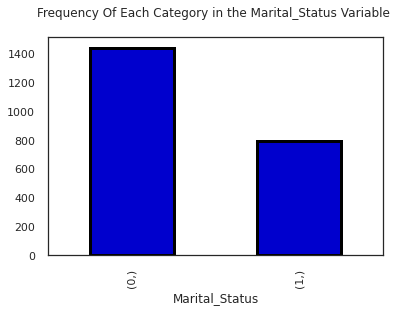

In [1841]:
#VISUALIZING THE ['Marital_Status']
print ("Maretial-status \n" , df['Marital_Status'].value_counts())
df[[ 'Marital_Status']].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Marital_Status Variable \n")



Education 
 0    2178
1      54
Name: Education, dtype: int64


Text(0.5, 1.0, 'Frequency Of Each Category in the Education Variable \n')

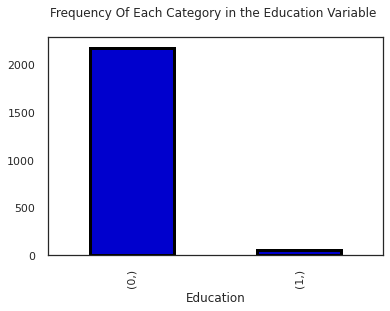

In [1842]:
#VISUALIZING THE ['Education']
print ("Education \n", df["Education"].value_counts())
df[[ 'Education']].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Education Variable \n")

### Removing irrelevant features

In [1843]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'Web', 'Catalog', 'Store',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Kids',
       'Total_Spend', 'Total_Purchases', 'Average_Spent',
       'TotalAcceptedOffers', 'Collected', 'Days_is_client'],
      dtype='object')

In [1844]:
irrelevantFeats = ['Kidhome', 'Teenhome', 'Year_Birth',
                   'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 
                   'AcceptedCmp1', 'AcceptedCmp2','Complain','Response','Wines', 'Fruits', 'Meat', 'Fish',
                    'Sweets', 'Gold','Collected','Dt_Customer','Web', 'Catalog', 'Store' ]
df.drop(irrelevantFeats, axis=1, inplace=True)
df.head()



,ID,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Age,Kids,Total_Spend,Total_Purchases,Average_Spent,TotalAcceptedOffers,Days_is_client
0,5524,0,1,58138.0,58,3,7,64,0,1617,25,64.68,1,971
1,2174,0,1,46344.0,38,2,5,67,2,27,6,4.50,0,125
2,4141,0,0,71613.0,26,1,4,56,0,776,21,36.95,0,472
3,6182,0,0,26646.0,26,2,6,37,1,53,8,6.62,0,65
4,5324,0,0,58293.0,94,5,5,40,1,422,19,22.21,0,321


In [1845]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumDealsPurchases', 'NumWebVisitsMonth', 'Age', 'Kids', 'Total_Spend',
       'Total_Purchases', 'Average_Spent', 'TotalAcceptedOffers',
       'Days_is_client'],
      dtype='object')

In [1846]:
# check the Data set 
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2232 non-null   int64  
 1   Education            2232 non-null   int64  
 2   Marital_Status       2232 non-null   int64  
 3   Income               2232 non-null   float64
 4   Recency              2232 non-null   int64  
 5   NumDealsPurchases    2232 non-null   int64  
 6   NumWebVisitsMonth    2232 non-null   int64  
 7   Age                  2232 non-null   int64  
 8   Kids                 2232 non-null   int64  
 9   Total_Spend          2232 non-null   int64  
 10  Total_Purchases      2232 non-null   int64  
 11  Average_Spent        2232 non-null   float64
 12  TotalAcceptedOffers  2232 non-null   int64  
 13  Days_is_client       2232 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 261.6 KB


## correlation matrix

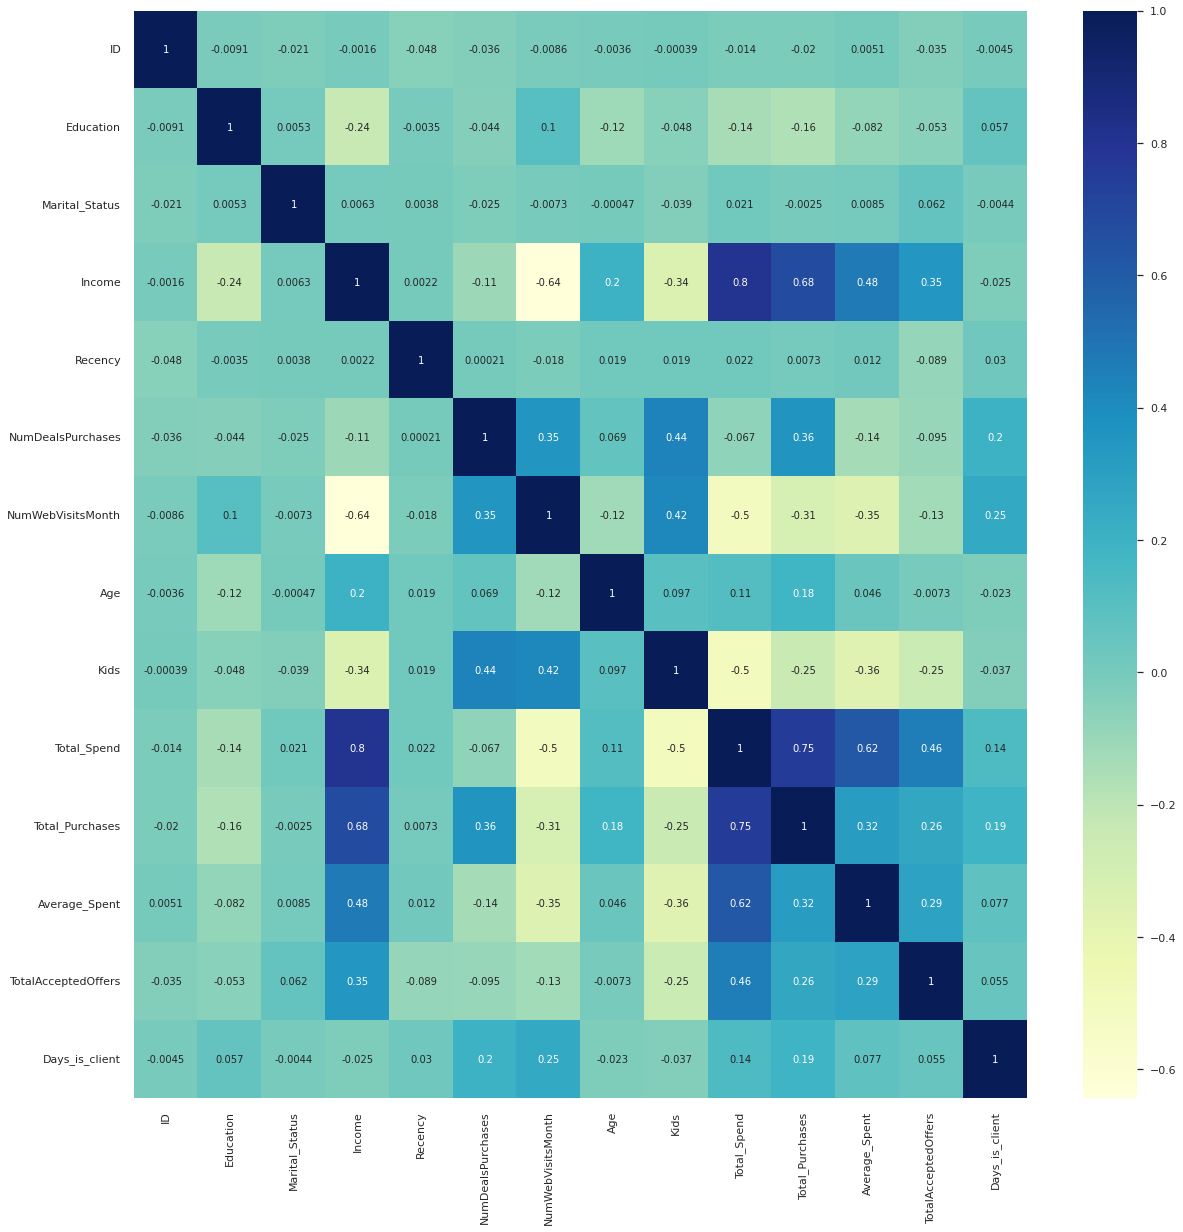

In [1847]:
# Cehck correlation matrix to remove low correlation features 
fig, ax = plt.subplots(figsize=(20,20))  
fig = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [1848]:
# Remove low correlation features 
irrelevantFeats = ['Recency','NumWebVisitsMonth']
df.drop(irrelevantFeats, axis=1, inplace=True)
df.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Total_Spend,Total_Purchases,Average_Spent,TotalAcceptedOffers,Days_is_client
0,5524,0,1,58138.0,3,64,0,1617,25,64.68,1,971
1,2174,0,1,46344.0,2,67,2,27,6,4.50,0,125
2,4141,0,0,71613.0,1,56,0,776,21,36.95,0,472
3,6182,0,0,26646.0,2,37,1,53,8,6.62,0,65
4,5324,0,0,58293.0,5,40,1,422,19,22.21,0,321


In [1849]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2232 non-null   int64  
 1   Education            2232 non-null   int64  
 2   Marital_Status       2232 non-null   int64  
 3   Income               2232 non-null   float64
 4   NumDealsPurchases    2232 non-null   int64  
 5   Age                  2232 non-null   int64  
 6   Kids                 2232 non-null   int64  
 7   Total_Spend          2232 non-null   int64  
 8   Total_Purchases      2232 non-null   int64  
 9   Average_Spent        2232 non-null   float64
 10  TotalAcceptedOffers  2232 non-null   int64  
 11  Days_is_client       2232 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 226.7 KB


## Check All the data is Numaric

In [1850]:
#Get list of Numirical variables
int_list = []
for col in df.columns:
    if df[col].dtypes == int or df[col].dtypes == float:
        int_list.append(col)
print(int_list)

['ID', 'Education', 'Marital_Status', 'Income', 'NumDealsPurchases', 'Age', 'Kids', 'Total_Spend', 'Total_Purchases', 'Average_Spent', 'TotalAcceptedOffers', 'Days_is_client']


In [1851]:
df.dtypes

ID                       int64
Education                int64
Marital_Status           int64
Income                 float64
NumDealsPurchases        int64
Age                      int64
Kids                     int64
Total_Spend              int64
Total_Purchases          int64
Average_Spent          float64
TotalAcceptedOffers      int64
Days_is_client           int64
dtype: object

In [1852]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In [1853]:
# check if any missing values
df.isna().any()

ID                     False
Education              False
Marital_Status         False
Income                 False
NumDealsPurchases      False
Age                    False
Kids                   False
Total_Spend            False
Total_Purchases        False
Average_Spent          False
TotalAcceptedOffers    False
Days_is_client         False
dtype: bool

## (5) Confirm data is ready with further exploratory analysis

In [1854]:
trace0 = go.Box(
    y=df['Income'],
    name='Income'
)

trace1 = go.Box(
    y=df['Age'],
    name='Age'
)

trace2 = go.Box(
    y=df['NumDealsPurchases'],
    name='Deals Purchases'
)

trace3 = go.Box(
    y=df['Total_Spend'],
    name='Total Spend'
)

trace4 = go.Box(
    y=df['TotalAcceptedOffers'],
    name='Total Accepted Offers'
)

trace5 = go.Box(
    y=df['Total_Purchases'],
    name='Total Purchases'
)



fig = make_subplots(rows=2, cols=3)

fig.append_trace(trace0, row = 1, col = 1)
fig.append_trace(trace1, row = 1, col = 2)
fig.append_trace(trace2, row = 1, col = 3)
fig.append_trace(trace3, row = 2, col = 1)
fig.append_trace(trace4, row = 2, col = 2)
fig.append_trace(trace5, row = 2, col = 3)

fig.update_layout(width=800, height=400, title='Box Plot to check for outliers')

fig.show()

In [1855]:
print("Data is cleand , Numaric and ready for Machine learning model")

Data is cleand , Numaric and ready for Machine learning model


## Export cleaned Numaric Data to CSV file

In [1856]:
# Export to CSV file
df.to_csv('./marketingDf_cleaned.csv', index=False)

## Import the cleaned Data for ML model 


In [1857]:
## importing the cleaned data csv file
df_cleaned = pd.read_csv('./marketingDf_cleaned.csv')

In [1858]:
df_cleaned.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Total_Spend,Total_Purchases,Average_Spent,TotalAcceptedOffers,Days_is_client
0,5524,0,1,58138.0,3,64,0,1617,25,64.68,1,971
1,2174,0,1,46344.0,2,67,2,27,6,4.50,0,125
2,4141,0,0,71613.0,1,56,0,776,21,36.95,0,472
3,6182,0,0,26646.0,2,37,1,53,8,6.62,0,65
4,5324,0,0,58293.0,5,40,1,422,19,22.21,0,321


## (6) Choose the label and features

In [1859]:
# Create two DataFrames for both the label and the features
labelDf = df_cleaned['Total_Spend']
featuresDf = df_cleaned.drop(['Total_Spend'], axis=1)
print(featuresDf.head())

     ID  Education  Marital_Status   Income  NumDealsPurchases  Age  Kids  \
0  5524          0               1  58138.0                  3   64     0   
1  2174          0               1  46344.0                  2   67     2   
2  4141          0               0  71613.0                  1   56     0   
3  6182          0               0  26646.0                  2   37     1   
4  5324          0               0  58293.0                  5   40     1   

   Total_Purchases  Average_Spent  TotalAcceptedOffers  Days_is_client  
0               25          64.68                    1             971  
1                6           4.50                    0             125  
2               21          36.95                    0             472  
3                8           6.62                    0              65  
4               19          22.21                    0             321  


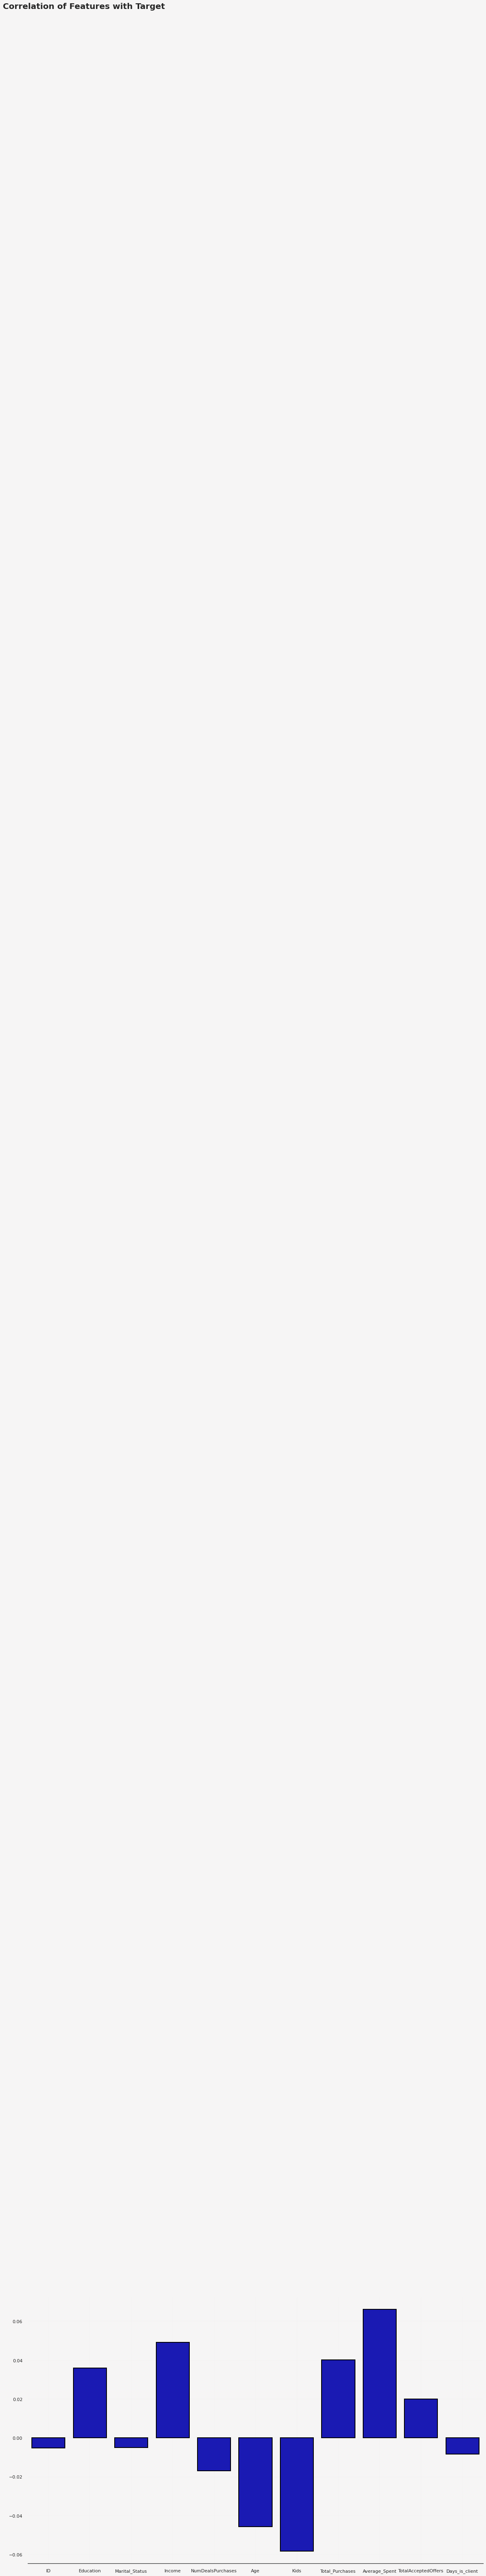

In [1860]:
# EDA: explore correlation 

import matplotlib
background_color = "#f6f5f5"

fig = plt.figure(figsize=(20, 12), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#2f5586", "#f6f5f5","#2f5586"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(featuresDf.corrwith(df['Total_Spend']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='mediumblue', zorder=3, edgecolor='black', linewidth=2)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

In [1861]:
df_cleaned.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Total_Spend,Total_Purchases,Average_Spent,TotalAcceptedOffers,Days_is_client
0,5524,0,1,58138.0,3,64,0,1617,25,64.68,1,971
1,2174,0,1,46344.0,2,67,2,27,6,4.50,0,125
2,4141,0,0,71613.0,1,56,0,776,21,36.95,0,472
3,6182,0,0,26646.0,2,37,1,53,8,6.62,0,65
4,5324,0,0,58293.0,5,40,1,422,19,22.21,0,321


##  (7) Training the Machine Learning Model (i.e, Fitting the Model)

In [1862]:
# (7) Training the Machine Learning Model (i.e, Fitting the Model)

df1 = df_cleaned.copy()

from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df1.values)
sf_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

sf_df.head().style.set_properties(**{"background-color": "#fffc99","color": "black", "border-color": "black"})



,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Total_Spend,Total_Purchases,Average_Spent,TotalAcceptedOffers,Days_is_client
0,-0.018744,-0.157459,1.349720,0.294340,0.346722,1.017252,-1.266206,1.678383,1.319135,0.696575,0.619142,1.974525
1,-1.051879,-0.157459,1.349720,-0.263234,-0.170926,1.273613,1.393721,-0.963984,-1.162208,-0.640396,-0.502550,-1.668565
2,-0.445259,-0.157459,-0.740894,0.931385,-0.688573,0.333622,-1.266206,0.280753,0.796747,0.080520,-0.502550,-0.174295
3,0.184183,-0.157459,-0.740894,-1.194478,-0.170926,-1.289999,0.063757,-0.920776,-0.901014,-0.593298,-0.502550,-1.926940
4,-0.080423,-0.157459,-0.740894,0.301668,1.382016,-1.033638,0.063757,-0.307547,0.535553,-0.246947,-0.502550,-0.824539


In [1863]:
#Initiating PCA to reduce dimentions  features to 3
pca = PCA(n_components=3)
pca.fit(sf_df)
PCA_ds = pd.DataFrame(pca.transform(sf_df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2232.0,9.102635e-18,1.849198,-3.160991,-1.648911,-0.321628,1.401031,14.305922
col2,2232.0,-1.213685e-17,1.280470,-6.677210,-0.699701,0.180731,0.881000,6.806671
col3,2232.0,4.291420e-17,1.095028,-2.438913,-0.730324,-0.057341,0.606023,5.994881


In [1864]:
cust_clust = sf_df[['Total_Spend', 'Total_Purchases',"Income"]].copy()

for i in cust_clust.columns:
    cust_clust[i] = StandardScaler().fit_transform(np.array(cust_clust[[i]]))

## Use Elbow method to estimate the optimal number of clusters 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



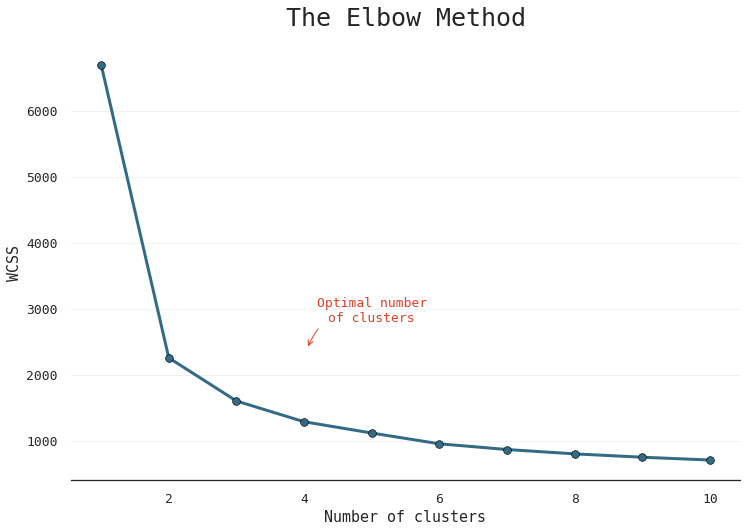

In [1865]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 228)
    km.fit(cust_clust)
    wcss.append(km.inertia_)
    
plt.figure(figsize = (12, 8))
plt.title('The Elbow Method', size = 25, y = 1.03, fontname = 'monospace')
plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
a = sns.lineplot(x = range(1, 11), y = wcss, color = '#336b87', linewidth = 3)
sns.scatterplot(x = range(1, 11), y = wcss, color = '#336b87', s = 60, edgecolor = 'black', zorder = 5)
plt.ylabel('WCSS', size = 15, fontname = 'monospace')
plt.xlabel('Number of clusters', size = 15, fontname = 'monospace')
plt.xticks(size = 13, fontname = 'monospace')
plt.yticks(size = 13, fontname = 'monospace')

for j in ['right', 'top', 'left']:
    a.spines[j].set_visible(False)
a.spines['bottom'].set_linewidth(1.3)
a.spines['left'].set_linewidth(1.3)

plt.annotate('''Optimal number
of clusters''', xy = (4.05, 2400), xytext = (5, 2800),
             arrowprops = dict(facecolor = 'steelblue', arrowstyle = "->", connectionstyle = "arc3,rad = 0.4",color = '#dd4124'), 
             fontsize = 13, fontfamily = 'monospace', ha = 'center', color = '#dd4124')

plt.show()



## K-Mean ML model

In [1866]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

gmm = GaussianMixture(n_components = 4, covariance_type = 'spherical', max_iter = 3000, random_state = 228).fit(cust_clust)
labels = gmm.predict(cust_clust)

df_cleaned['Cluster'] = labels
re_clust = {
    0: 'Elite client',
    1: 'Cheap client',
    2: 'Good client',
    3: 'Discount client'
}
df_cleaned['Cluster'] = df_cleaned['Cluster'].map(re_clust)

In [1867]:
fig = px.pie(df_cleaned['Cluster'].value_counts().reset_index(), values = 'Cluster', names = 'index', width = 700, height = 700)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#dd4124','#009473', '#336b87', '#b4b4b4'], line = dict(color = 'white', width = 2)),
                  hovertemplate = 'Clients: %{value}')

fig.update_layout(annotations = [dict(text = 'Number of clients <br>by cluster', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()

** Income vs spending plot shows the clusters pattern**


*   Cluster 0: People with the highest incomes and high spending habits 
that tend to have one child. We will call this group Elite customers.
*Cluster 1: People with higher income and higher spending habits. We will call this group Good cuatomers.
*   Cluster 2: People with lower incomes and low spending habits that also have the lowest time enrolled as a member. We will call this group Discount customers.
* Cluster 3: People with lowest incomes and lowest spending habits. We will call this group Cheap customers.

## 3d Scatter Plot - Customers clusters

In [1868]:
plot = go.Figure()

colors = ['#dd4124','#009473', '#336b87', '#b4b4b4']
names = [ 'Elite client','Good client','Discount client','Cheap client',]

for i in range(4):
    cl = names[i]
    plot.add_trace(go.Scatter3d(x = df_cleaned.query("Cluster == @cl")['Total_Purchases'],
                                y = df_cleaned.query("Cluster == @cl")['Income'],
                                z = df_cleaned.query("Cluster == @cl")['Total_Spend'],
                                mode = 'markers',
                                name = names[i],
                                marker = dict(
                                    size = 2,
                                    color = colors[i],  
                                    opacity = 0.6)))

plot.update_traces(hovertemplate = 'Purchases: %{x} <br> Income: %{y} <br> Total_Spend: %{z}')

plot.update_layout(width = 800, height = 800, autosize = True, showlegend = False,
                   scene = dict(xaxis = dict(title = 'Count of purchases', titlefont_color = 'black'),
                                yaxis = dict(title = 'Income', titlefont_color = 'black'),
                                zaxis = dict(title = 'Total spent', titlefont_color = 'black')),
                   font = dict(family = "monospace", color  = 'black', size = 14),
                   title_text = 'Customers clusters', title_x = 0.5)

## Scatter plot showing the Correlation between income and 
the total amount of money spent

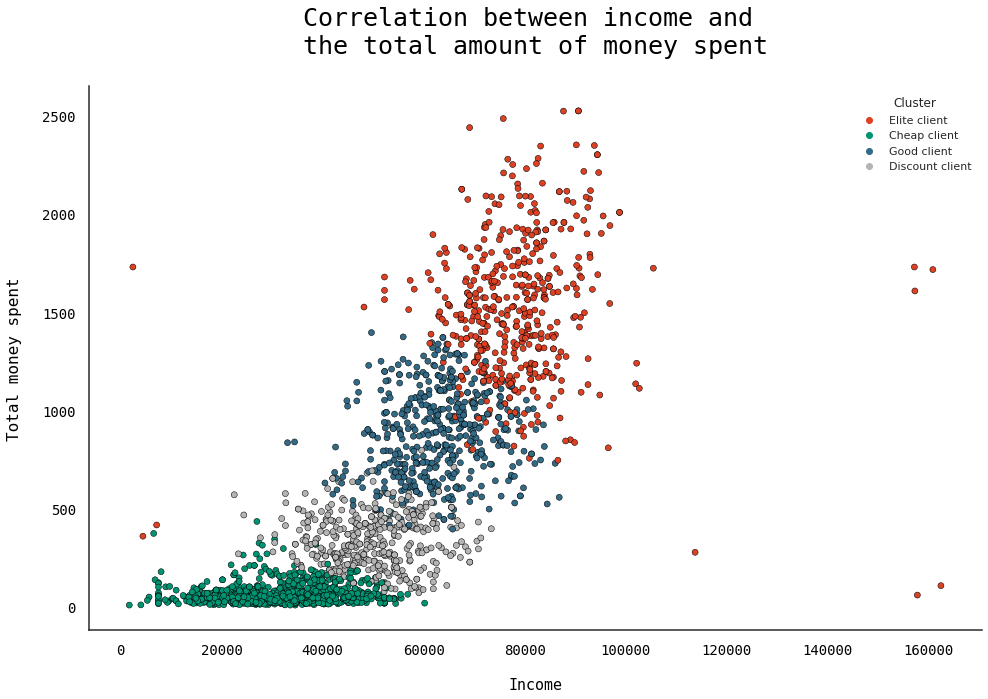

In [1869]:
plt.figure(figsize = (16, 10))
sns.set_style("white")
plt.title('''Correlation between income and 
the total amount of money spent''', size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = df_cleaned, x = "Income", y = "Total_Spend", hue = "Cluster", palette = ['#dd4124','#009473', '#336b87', '#b4b4b4'], sizes = (1, 8), linewidth = 0.5, edgecolor = "black")
plt.xticks(fontname = 'monospace', size = 14, color = 'black')
plt.yticks(fontname = 'monospace', size = 14, color = 'black')
plt.xlabel('Income', labelpad = 20, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel('Total money spent', labelpad = 20, fontname = 'monospace', fontsize = 16, color = 'black')


for j in ['right', 'top']:
        a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)
    
plt.show()

## Distribution of purchases by clusters and product categories

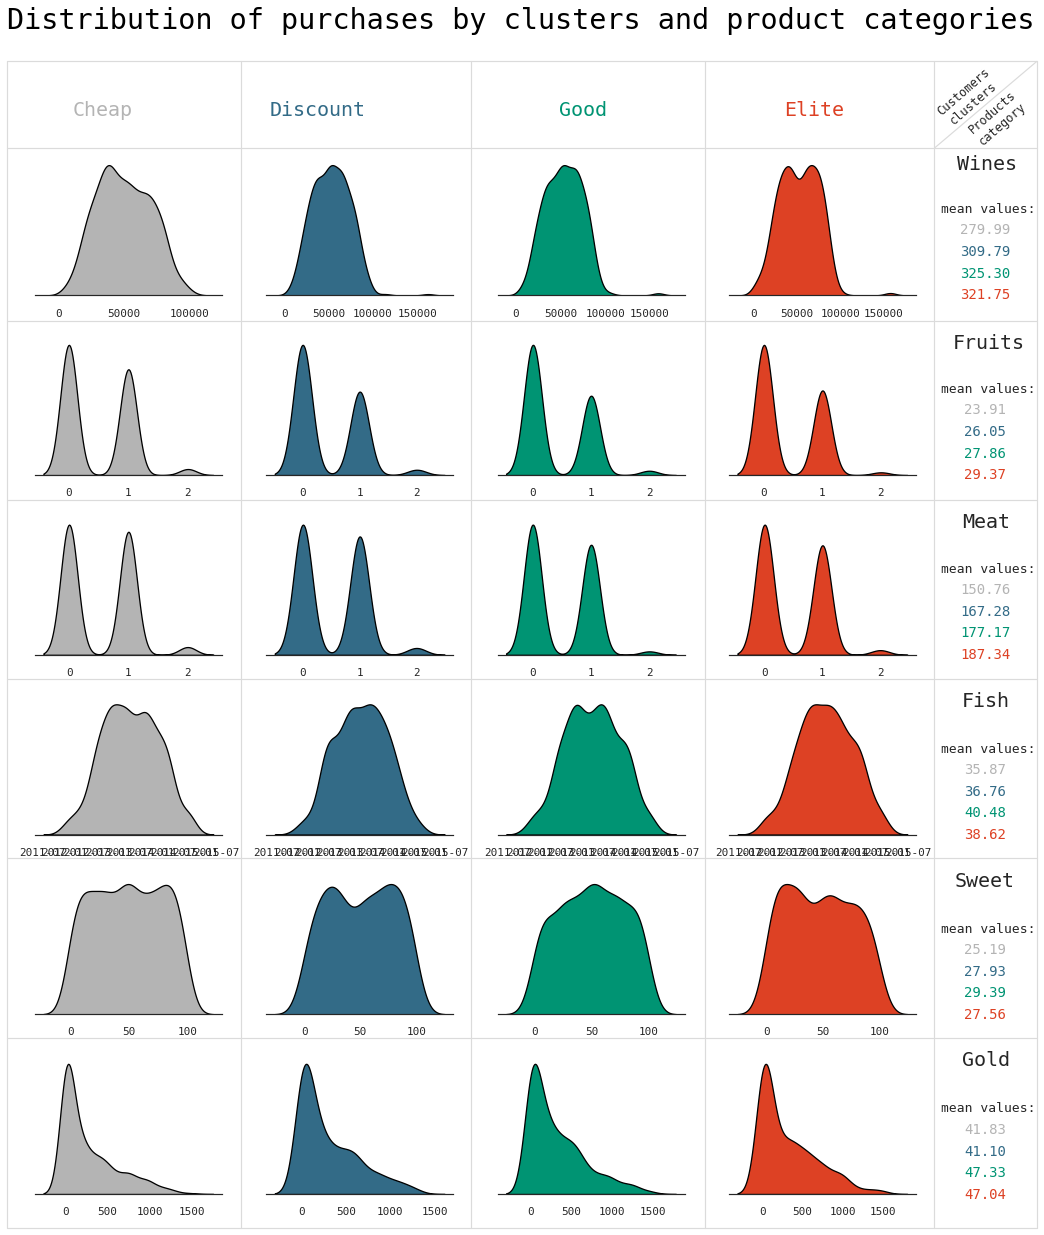

In [1871]:
import matplotlib.lines as lines
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.testing import assert_equal, assert_almost_equal
cust= cust.rename(columns = {'MntWines': 'Wines', 
                       'MntFruits': 'Fruits', 
                       'MntMeatProducts': 'Meat', 
                       'MntFishProducts': 'Fish', 
                       'MntSweetProducts': 'Sweets', 
                       'MntGoldProds': 'Gold'})
cust["Cluster"]=df_cleaned["Cluster"]

cl = ['Cheap client', 'Discount client', 'Good client', 'Elite client']
colors = {
    'Cheap client': '#b4b4b4',
    'Discount client': '#336b87',
    'Good client': '#009473',
    'Elite client': '#dd4124'
}

fig = plt.figure(figsize = (13, 15))
p = 1
for i in range(len(cust.columns.tolist()[9:15])):
    for k in cl:
        plt.subplot(6, 4, p)
        sns.set_style("white")
        a = sns.kdeplot(cust.query("Cluster == @k")[cust.columns.tolist()[4:10][i]], color = colors[k], alpha = 1, shade = True, linewidth = 1.3, edgecolor = 'black')
        plt.ylabel('')
        plt.xlabel('')
        plt.xticks(fontname = 'monospace')
        plt.yticks([])
        for j in ['right', 'left', 'top']:
            a.spines[j].set_visible(False)
            a.spines['bottom'].set_linewidth(1.2)
        p += 1  

plt.figtext(0., 1.11, 'Distribution of purchases by clusters and product categories', fontname = 'monospace', size = 28.5, color = 'black')        

plt.figtext(0.07, 1.03, 'Cheap', fontname = 'monospace', size = 20, color = '#b4b4b4')      
plt.figtext(0.28, 1.03, 'Discount', fontname = 'monospace', size = 20, color = '#336b87') 
plt.figtext(0.59, 1.03, 'Good', fontname = 'monospace', size = 20, color = '#009473') 
plt.figtext(0.83, 1.03, 'Elite', fontname = 'monospace', size = 20, color = '#dd4124') 

plt.figtext(1.015, 0.98, 'Wines', fontname = 'monospace', size = 20)   
plt.figtext(1.01, 0.814, 'Fruits', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.648, 'Meat', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.482, 'Fish', fontname = 'monospace', size = 20)
plt.figtext(1.012, 0.316, 'Sweet', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.15, 'Gold', fontname = 'monospace', size = 20)
l1 = lines.Line2D([0.99, 0.99], [1.08, 0], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l1])
l2 = lines.Line2D([0.0, 1.1], [1, 1], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l2])
l3 = lines.Line2D([0.991, 1.1], [1, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l3])
l4 = lines.Line2D([0, 1.1], [1.08, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l4])
l5 = lines.Line2D([1.1, 1.1], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l5])
l6 = lines.Line2D([0, 0], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l6])
l7 = lines.Line2D([0, 1.1], [0, 0], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l7])
l8 = lines.Line2D([0, 1.1], [0.84, 0.84], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l8])
l9 = lines.Line2D([0, 1.1], [0.674, 0.674], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l9])
l10 = lines.Line2D([0, 1.1], [0.508, 0.508], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l10])
l11 = lines.Line2D([0, 1.1], [0.342, 0.342], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l11])
l12 = lines.Line2D([0, 1.1], [0.176, 0.176], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l12])
l13 = lines.Line2D([0.25, 0.25], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l13])
l14 = lines.Line2D([0.495, 0.495], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l14])
l15 = lines.Line2D([0.745, 0.745], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l15])

plt.figtext(1.027, 1.02, '''Customers
clusters''', fontname = 'monospace', size = 12, rotation = 41, ha = 'center')   
plt.figtext(1.025, 1.003, '''Products
category''', fontname = 'monospace', size = 12, rotation = 41)

y = 0.94
for i in range(6):
    plt.figtext(0.998, y, 'mean values:', fontname = 'monospace', size = 13)
    y -= 0.1666

y = 0.92
for i in cust.columns.tolist()[9:15]:
    plt.figtext(1.045, y, format(cust.query("Cluster == 'Cheap client'")[i].mean(), ".2f"), fontname = 'monospace', size = 14, color = '#b4b4b4', ha = 'center')
    y -= 0.1666

y = 0.9
for i in cust.columns.tolist()[9:15]:
    plt.figtext(1.045, y, format(cust.query("Cluster == 'Discount client'")[i].mean(), ".2f"), fontname = 'monospace', size = 14, color = '#336b87', ha = 'center')
    y -= 0.1666

y = 0.88
for i in cust.columns.tolist()[9:15]:
    plt.figtext(1.045, y, format(cust.query("Cluster == 'Good client'")[i].mean(), ".2f"), fontname = 'monospace', size = 14, color = '#009473', ha = 'center')
    y -= 0.1666

y = 0.86
for i in cust.columns.tolist()[9:15]:
    plt.figtext(1.045, y, format(cust.query("Cluster == 'Elite client'")[i].mean(), ".2f"), fontname = 'monospace', size = 14, color = '#dd4124', ha = 'center')
    y -= 0.1666

fig.tight_layout(h_pad = 2)
plt.show()

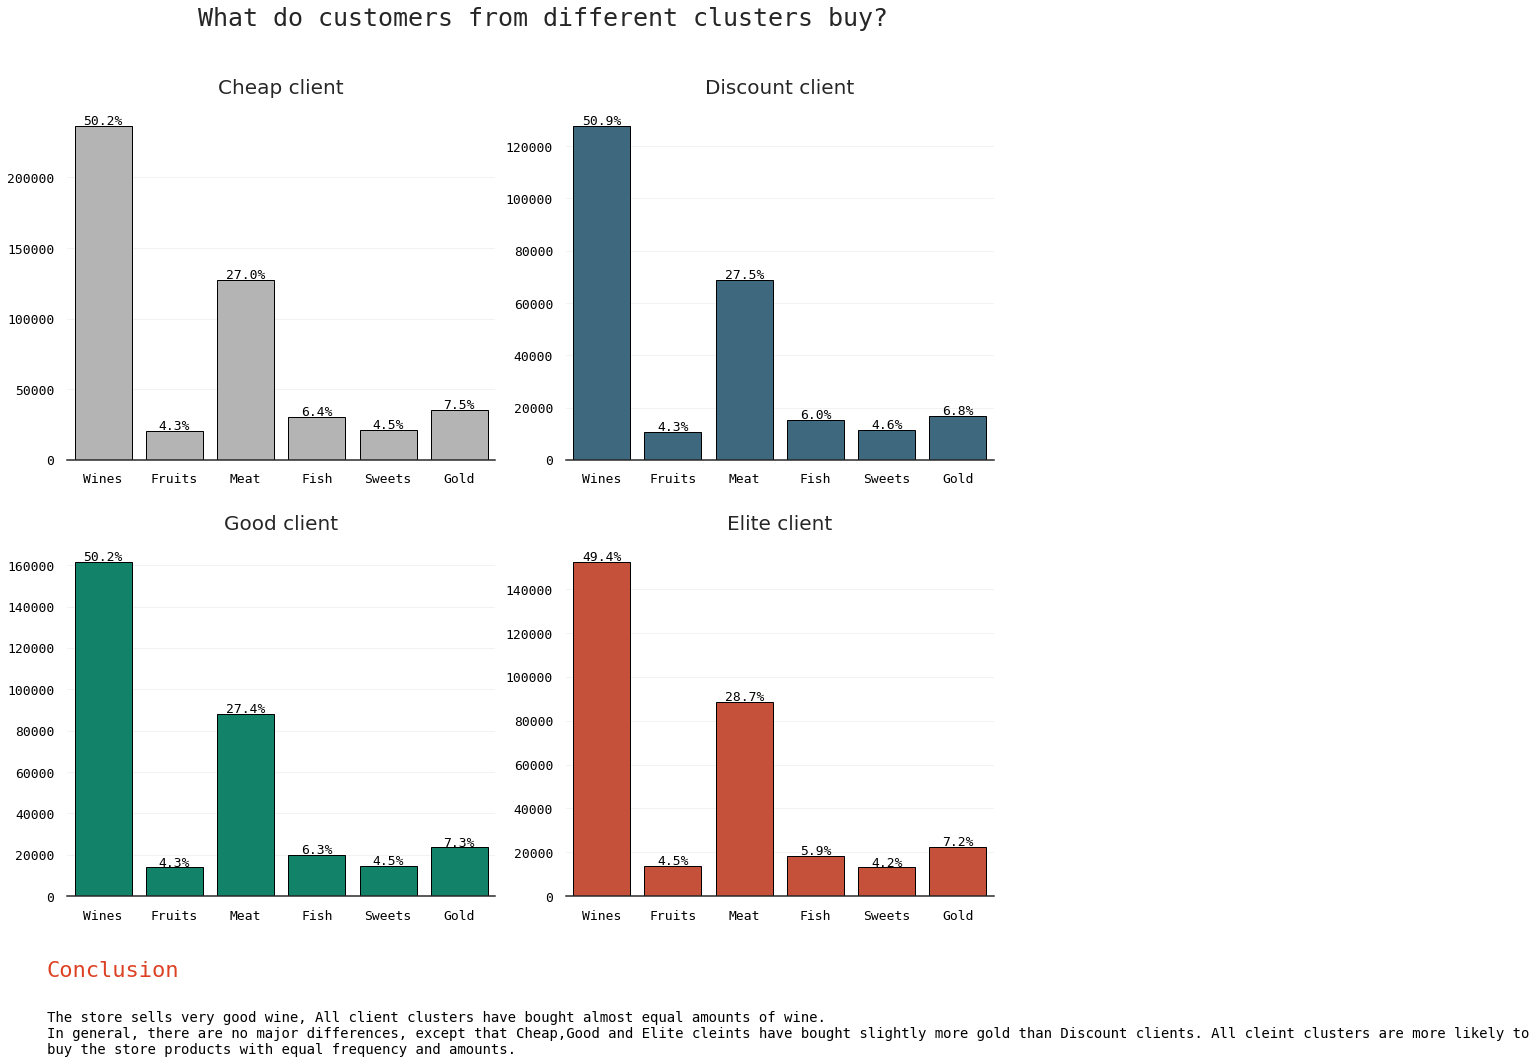

In [1872]:
fig = plt.figure(figsize = (14, 12))
k = 1

for i in cl:
    ass = cust.groupby(['Cluster']).agg({'Wines': 'sum', 'Fruits': 'sum', 'Meat': 'sum', 'Fish': 'sum', 'Sweets': 'sum', 'Gold': 'sum'}).transpose().reset_index().rename(columns = {'index': 'Category'})[['Category', i]]
    plt.subplot(2, 2, k)
    plt.title(i, size = 20, x = 0.5, y = 1.03)
    plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
    a = sns.barplot(data = ass, x = 'Category', y = i, color = colors[i], linestyle = "-", linewidth = 1, edgecolor = "black")
    plt.xticks(fontname = 'monospace', size = 13, color = 'black')
    plt.yticks(fontname = 'monospace', size = 13, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
    for p in a.patches:
        height = p.get_height()
        a.annotate(f'{round((height / sum(ass[i])) * 100, 1)}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 13,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   fontname = 'monospace', color = 'black')
        
    for j in ['right', 'top', 'left']:
        a.spines[j].set_visible(False)
    for j in ['bottom']:
        a.spines[j].set_linewidth(1.5)
    k += 1
    
plt.figtext(0.05, -0.05, 'Conclusion', fontname = 'monospace', size = 22, color = '#dd4124')
plt.figtext(0.05, -0.14, '''The store sells very good wine, All client clusters have bought almost equal amounts of wine. 
In general, there are no major differences, except that Cheap,Good and Elite cleints have bought slightly more gold than Discount clients. All cleint clusters are more likely to
buy the store products with equal frequency and amounts.''', fontname = 'monospace', size = 14, color = 'black')
    
plt.figtext(0.2, 1.05, 'What do customers from different clusters buy?', fontname = 'monospace', size = 25)
fig.tight_layout(h_pad = 3)    
plt.show()

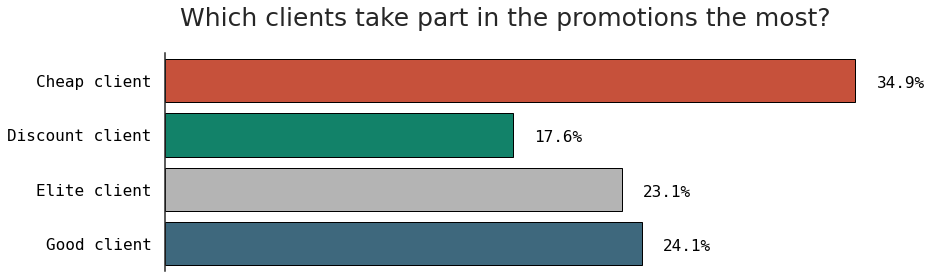

In [1873]:


fig = plt.figure(figsize = (13, 4))
palette = ['#dd4124', '#009473', '#b4b4b4', '#336b87']
plt.title('Which clients take part in the promotions the most?', size = 25, x = 0.47, y = 1.1)
a = sns.barplot(data = cust.groupby(['Cluster']).agg({'TotalAcceptedOffers': 'sum'}).reset_index(), 
                x = 'TotalAcceptedOffers', y = 'Cluster', palette = palette, linestyle = "-", linewidth = 1, edgecolor = "black")
plt.xticks([])
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(23 + width, p.get_y() + 0.55*p.get_height(), f'{round((width / 1001) * 100, 1)}%',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 16, color = 'black')
    
for j in ['right', 'top', 'bottom']:
    a.spines[j].set_visible(False)
a.spines['left'].set_linewidth(1.5)

plt.show()



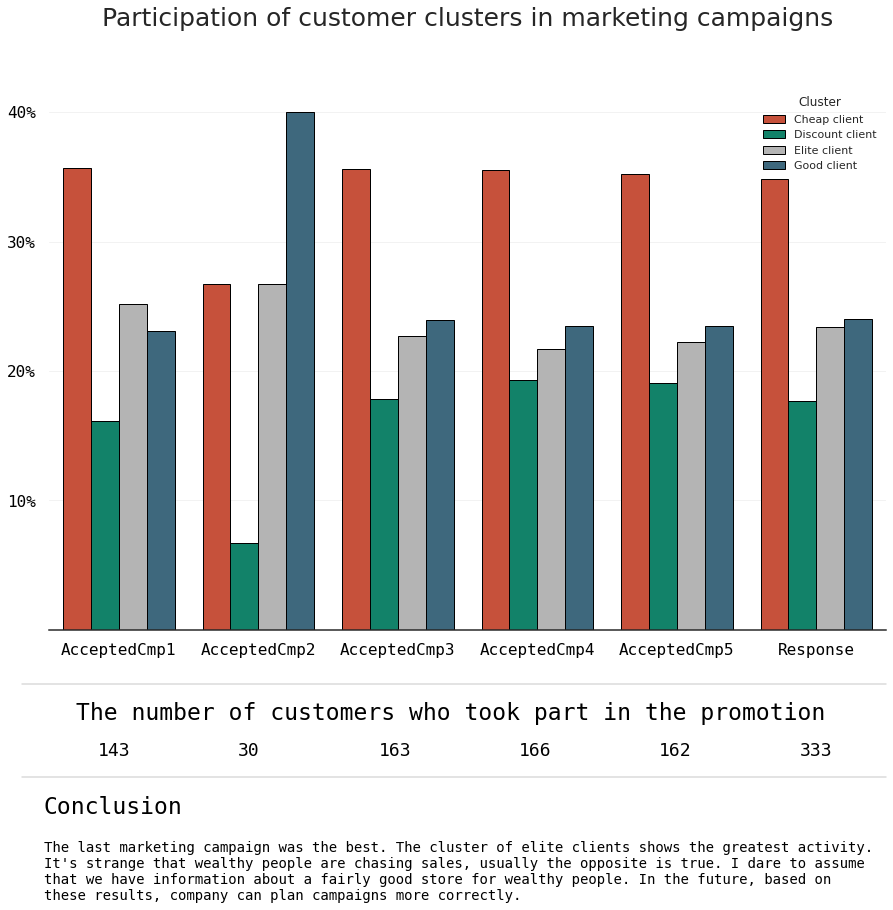

In [1874]:
from matplotlib.ticker import FixedLocator, FixedFormatter
df = cust.groupby(['Cluster']).agg({'AcceptedCmp1': 'sum','AcceptedCmp2': 'sum', 
                               'AcceptedCmp3': 'sum','AcceptedCmp4': 'sum', 
                               'AcceptedCmp5': 'sum', 'Response': 'sum'}).stack().reset_index().rename(columns = {'level_1':'Cmp', 0: 'value'})
df['sum'] = df.groupby(['Cmp'])['value'].transform('sum')
df['percentage'] = round(df['value'] / df['sum'] * 100, 1)

fig = plt.figure(figsize = (15, 10))
plt.title('Participation of customer clusters in marketing campaigns', size = 25, x = 0.5, y = 1.1)
plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
a = sns.barplot(data = df, x = 'Cmp', y = 'percentage', hue = 'Cluster', dodge = True, palette = palette, linestyle = "-", linewidth = 1, edgecolor = "black")
plt.xticks(fontname = 'monospace', size = 16, color = 'black')
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')

a.yaxis.set_major_formatter(FixedFormatter(['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%']))
a.yaxis.set_major_locator(FixedLocator([10, 20, 30, 40, 50, 60, 70, 80]))

for j in ['right', 'top', 'left']:
    a.spines[j].set_visible(False)
for j in ['bottom']:
    a.spines[j].set_linewidth(1.5)

l1 = lines.Line2D([0.1, 0.9], [0.05, 0.05], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l1])

plt.figtext(0.15, 0, 'The number of customers who took part in the promotion', fontname = 'monospace', size = 23, color = 'black')

x = 0.17
for i in df[:6]['sum'].tolist():
    plt.figtext(x, -0.05, i, fontname = 'monospace', size = 18, color = 'black')
    x += 0.13

l2 = lines.Line2D([0.1, 0.9], [-0.08, -0.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l2])

plt.figtext(0.12, -0.13, 'Conclusion', fontname = 'monospace', size = 23, color = 'black')
plt.figtext(0.12, -0.25, '''The last marketing campaign was the best. The cluster of elite clients shows the greatest activity.
It's strange that wealthy people are chasing sales, usually the opposite is true. I dare to assume
that we have information about a fairly good store for wealthy people. In the future, based on
these results, company can plan campaigns more correctly.''', fontname = 'monospace', size = 14, color = 'black')


plt.show()

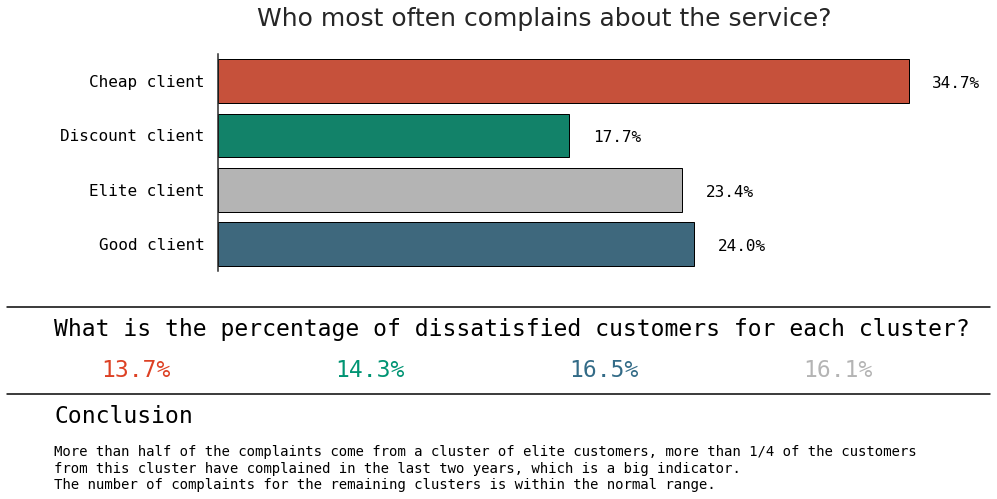

In [1875]:
fig = plt.figure(figsize = (13, 4))
plt.title('Who most often complains about the service?', size = 25, x = 0.45, y = 1.1)
a = sns.barplot(data = cust.groupby(['Cluster']).agg({'Response': 'sum'}).reset_index(), 
                x = 'Response', y = 'Cluster', palette = palette, linestyle = "-", linewidth = 1, edgecolor = "black")
plt.xticks([])
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(8 + width, p.get_y() + 0.55*p.get_height(), f'{round((width / 334) * 100, 1)}%',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 16, color = 'black')

for j in ['right', 'top', 'bottom']:
    a.spines[j].set_visible(False)
a.spines['left'].set_linewidth(1.5)

l1 = lines.Line2D([-0.1, 0.95], [0, 0], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l1])

plt.figtext(-0.05, -0.1, 'What is the percentage of dissatisfied customers for each cluster?', fontname = 'monospace', size = 23, color = 'black')

x = 0
cl = 0
colors = ['#dd4124', '#009473', '#336b87', '#b4b4b4']
for i in round(cust.groupby(['Cluster']).agg({'Response': 'mean'}).reset_index()['Response'] * 100, 1):
    plt.figtext(x, -0.24, f'{i}%', fontname = 'monospace', size = 23, color = colors[cl])
    x += 0.25
    cl += 1

l2 = lines.Line2D([-0.1, 0.95], [-0.3, -0.3], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l2])

plt.figtext(-0.05, -0.4, 'Conclusion', fontname = 'monospace', size = 23, color = 'black')
plt.figtext(-0.05, -0.63, '''More than half of the complaints come from a cluster of elite customers, more than 1/4 of the customers
from this cluster have complained in the last two years, which is a big indicator.
The number of complaints for the remaining clusters is within the normal range.''', fontname = 'monospace', size = 14, color = 'black')

plt.show()

## Analysis of Age in each Customer cluster

In [1877]:
# df['Age'] = np.where(df['Age'] <= 30, "(0,30]", np.where(df['Age'] <= 45, "(30,45]", np.where(df['Age'] <= 60, "(45,60]","[60, ]")))
cust['Age'] = np.where(cust['Age'] <= 30, "(0,30]", np.where(cust['Age'] <= 40, "(30,40]", np.where(cust['Age'] <= 50, "(40,50]", np.where(cust['Age'] <= 60, "(50, 60]", np.where(cust['Age'] <=70, "(60, 70]", (70, ))))))

In [1878]:
df_plot = cust[['Age', 'Cluster', 'ID']].groupby(['Age', 'Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Number of Customers"}, inplace=True)


fig = px.bar(df_plot, x="Age", y="Number of Customers",
             color='Cluster', barmode='group',
             height=400)
fig.show()

## Analysis of Marital Status in each customer cluster


In [1879]:
df_plot = cust[['Marital_Status', 'Cluster', 'ID']].groupby(['Marital_Status', 'Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Count of Customers"}, inplace=True)


fig = px.bar(df_plot, x="Marital_Status", y="Count of Customers",
             color='Cluster', barmode='group',
             height=400)
fig.show()

## Analysis of Income in each customer cluster 

In [1880]:
df_plot = cust[['Cluster', 'Income']].groupby(['Cluster']).agg({'Income': 'mean'})
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"Income":"Mean Income"}, inplace=True)

df_plot_ = cust[['Cluster', 'Total_Spend']].groupby(['Cluster']).agg({'Total_Spend': 'mean'})
df_plot_.reset_index(inplace=True)
df_plot_.rename(columns={"Total_Spend":"Mean Spend"}, inplace=True)


trace1 = go.Bar(
    x=df_plot['Cluster'],
    y=df_plot['Mean Income'],
    name='Mean Income of Clusters'
)
trace2 = go.Bar(
    x=df_plot_['Cluster'],
    y=df_plot_['Mean Spend'],
    name='Mean Spend of Cluster'
)

fig = make_subplots(rows=1, cols=2, shared_xaxes=True)

fig.append_trace(trace1, row = 1, col = 1)
fig.append_trace(trace2, row = 1, col = 2)

fig.update_layout(width=900, height=500, title='Mean Income & Spend')

fig.show()

## Analysis of Education in each Customer cluster 

In [1881]:
df_plot = cust[['Education', 'Cluster', 'ID']].groupby(['Education', 'Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Count of Customers"}, inplace=True)


fig = px.bar(df_plot, x="Education", y="Count of Customers",
             color='Cluster', barmode='group',
             height=400)
fig.update_layout(title="Education")
fig.show()

## Analysis of Total Purchase in each Customer cluster

In [1882]:
df_plot = cust[['Total_Purchases', 'Cluster', 'ID']].groupby(['Cluster']).agg({"ID":"count", "Total_Purchases":"sum"})
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"Total_Purchases":"Number of Purchases", "ID":"Customers"}, inplace=True)
df_plot['Purchase/Customer'] = df_plot['Number of Purchases']/df_plot['Customers']

fig = px.bar(df_plot, x="Cluster", y="Purchase/Customer",
             color='Cluster',
             height=400)
fig.update_layout(title="Purchase/Customer")
fig.show()

## Analysis of Total spend / purchase in each customer cluster 


In [1883]:
df_plot = cust[['Total_Purchases', 'Cluster', 'Total_Spend']].groupby(['Cluster']).agg({"Total_Spend":"sum", "Total_Purchases":"sum"})
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"Total_Purchases":"Total Purchases", "Total_Spend":"Spend"}, inplace=True)

df_plot['Spend/Purchase'] = df_plot['Spend']/df_plot['Total Purchases']
fig = px.bar(df_plot, x="Cluster", y="Spend/Purchase",
             color='Cluster',
             height=400)
fig.update_layout(title="Spend/Customer")
fig.show()

## Analysis of number of deals purchase in each customer cluster

In [1884]:
df_plot = cust[['NumDealsPurchases', 'Cluster', 'ID']].groupby(['Cluster']).agg({"ID":"count", "NumDealsPurchases":"sum"})
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Total Customers", "NumDealsPurchases":"Deals"}, inplace=True)

df_plot['Deals/Customers'] = df_plot['Deals']/df_plot['Total Customers']
fig = px.bar(df_plot, x="Cluster", y="Deals/Customers",
             color='Cluster',
             height=400)
fig.update_layout(title="Deals/Customers")
fig.show()

## Analysis of days of enrollment in each customer cluster

In [1885]:
df_plot = cust[['Cluster', 'Days_is_client']].groupby(['Cluster']).agg({'Days_is_client': 'mean'})
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"Days_is_client":"Days since Enrollment"}, inplace=True)

fig = px.bar(df_plot, x="Cluster", y="Days since Enrollment",
             color='Cluster',
             height=400)
fig.update_layout(title="Days since Enrollment")
fig.show()

##Conclusion
To conclude this project, we'll offer some recommendations for the company based on our analysis:

Wine and meat are the most popular products amongst all the groups. It would be beneficial to offer a greater variety of these products or special deals in these categories.

People with no children tend to spend the most on their groceries. As a marketing recommendation, the business could implement campaigns targeting this segment.

On the other hand, there is a certain group of consumers that don't spend much on their groceries. For this group, they could offer a section with very affordable and cheap products.

Most of the consumers have enrolled for a company membership for a long period of time. To promote and protect loyal clients, the company can offer some free samples or coupons to active, long-time customers.

## (8) Use the model for prediction


In [1886]:
cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,Web,Catalog,Store,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Total_Spend,Total_Purchases,Average_Spent,TotalAcceptedOffers,Collected,Days_is_client,Cluster
0,5524,1957,Post Graduate,non_relationship,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,"(60, 70]",0,1617,25,64.68,1,2014-12-06,971,Elite client
1,2174,1954,Post Graduate,non_relationship,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,"(60, 70]",2,27,6,4.50,0,2014-12-06,125,Cheap client
2,4141,1965,Post Graduate,in_relationship,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,"(50, 60]",0,776,21,36.95,0,2014-12-06,472,Good client
3,6182,1984,Post Graduate,in_relationship,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,"(30,40]",1,53,8,6.62,0,2014-12-06,65,Cheap client
4,5324,1981,Post Graduate,in_relationship,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,"(30,40]",1,422,19,22.21,0,2014-12-06,321,Discount client


In [1887]:
cust.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'Web', 'Catalog', 'Store',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Kids',
       'Total_Spend', 'Total_Purchases', 'Average_Spent',
       'TotalAcceptedOffers', 'Collected', 'Days_is_client', 'Cluster'],
      dtype='object')

In [1888]:
df_cleaned.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Total_Spend,Total_Purchases,Average_Spent,TotalAcceptedOffers,Days_is_client,Cluster
0,5524,0,1,58138.0,3,64,0,1617,25,64.68,1,971,Elite client
1,2174,0,1,46344.0,2,67,2,27,6,4.50,0,125,Cheap client
2,4141,0,0,71613.0,1,56,0,776,21,36.95,0,472,Good client
3,6182,0,0,26646.0,2,37,1,53,8,6.62,0,65,Cheap client
4,5324,0,0,58293.0,5,40,1,422,19,22.21,0,321,Discount client


In [1889]:
df_cleaned.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'NumDealsPurchases',
       'Age', 'Kids', 'Total_Spend', 'Total_Purchases', 'Average_Spent',
       'TotalAcceptedOffers', 'Days_is_client', 'Cluster'],
      dtype='object')

In [1890]:
# Drop ID (irrelevant) & Cluster (Prediction)
df_predict = df_cleaned
df_predict.drop(["ID","Cluster"], axis=1, inplace=True)
    


In [1891]:
df_predict.head()


,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Total_Spend,Total_Purchases,Average_Spent,TotalAcceptedOffers,Days_is_client
0,0,1,58138.0,3,64,0,1617,25,64.68,1,971
1,0,1,46344.0,2,67,2,27,6,4.50,0,125
2,0,0,71613.0,1,56,0,776,21,36.95,0,472
3,0,0,26646.0,2,37,1,53,8,6.62,0,65
4,0,0,58293.0,5,40,1,422,19,22.21,0,321


In [1892]:
# Features of New customer used to predit his cluster 
df_predict = {
 "Education": [1],
 "Marital_Status ": [1],
 "Income":[2500],
 "NumDealsPurchases":[0],
 "Age":[27],
 "Kids":[1],
 "Total_Spend":[555],
 "Total_Purchases":[8],
 "Average_Spent":[78],
 "TotalAcceptedOffers":[1],
 "Days_is_client":[435]

}

In [1893]:
df_predict  = pd.DataFrame(data=df_predict )
df_predict.head()

,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Total_Spend,Total_Purchases,Average_Spent,TotalAcceptedOffers,Days_is_client
0,1,1,2500,0,27,1,555,8,78,1,435


In [1894]:
# Use 4 clusters and fit my model

kmeans_predict = KMeans(n_clusters=4)
k_fit = kmeans_predict.fit(df_cleaned)

In [1895]:
print(k_fit)

KMeans(n_clusters=4)


In [1896]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_cleaned['Cluster'] = predictions
df_cleaned.head()

,Education,Marital_Status,Income,NumDealsPurchases,Age,...,Total_Purchases,Average_Spent,TotalAcceptedOffers,Days_is_client,Cluster
0,0,1,58138.0,3,64,...,25,64.68,1,971,1
1,0,1,46344.0,2,67,...,6,4.50,0,125,0
2,0,0,71613.0,1,56,...,21,36.95,0,472,1
3,0,0,26646.0,2,37,...,8,6.62,0,65,2
4,0,0,58293.0,5,40,...,19,22.21,0,321,1


Clusters 
 0    689
1    642
2    498
3    403
Name: Cluster, dtype: int64


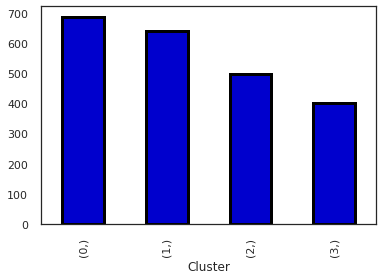

In [1897]:
#VISUALIZING THE ['clusters']
print ("Clusters \n" , df_cleaned['Cluster'].value_counts())
df_cleaned[[ 'Cluster']].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)

In [1899]:
# Predist the customer cluster using the model
#    0: 'Elite client',
#    1: 'Cheap client',
#    2: 'Good client',
#    3: 'Discount client'
New_customer_personality = k_fit.predict(df_predict)
print('New Customer Personality Cluster: ', New_customer_personality)

New Customer Personality Cluster:  [2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Marital_Status 
Feature names seen at fit time, yet now missing:
- Marital_Status




##  Write final predicted data

In [1939]:
# Export to CSV file
df_predict["Cluster"]= New_customer_personality
df_predict.to_csv('./marketingDf_predicted.csv', index=False)